In [1]:
%matplotlib inline

1. Predict with pre-trained Mask RCNN models
===============================================

This article shows how to play with pre-trained Mask RCNN model.

Mask RCNN networks are extensions to Faster RCNN networks.
:py:class:`gluoncv.model_zoo.MaskRCNN` is inherited from
:py:class:`gluoncv.model_zoo.FasterRCNN`.
It is highly recommended to read :doc:`../examples_detection/demo_faster_rcnn` first.

First let's import some necessary libraries:


In [14]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
import mxnet as mx


Load a pretrained model
-------------------------

Let's get an Mask RCNN model trained on COCO dataset with ResNet-50 backbone.
By specifying ``pretrained=True``, it will automatically download the model
from the model zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.MaskRCNN`
with a default context of `cpu(0)`.



In [15]:
# using GPU
ctx = mx.gpu(0)
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True,ctx = mx.gpu(0))

print(type(ctx))

<class 'mxnet.context.Context'>


Pre-process an image
--------------------

The pre-processing step is identical to Faster RCNN.

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



# for one picture

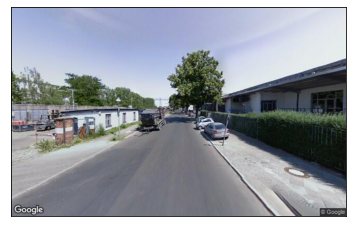

In [16]:
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv


# Image path
path = 'originSVI/'
file_name = '21.jpg'

x, orig_img = data.transforms.presets.rcnn.load_test(path+file_name)
plt.xticks([])
plt.yticks([])
plt.imshow(orig_img)
plt.show()


Inference and display
---------------------

The Mask RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates and segmentation masks.
Their shape are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1)
(batch_size, num_bboxes, 4), and (batch_size, num_bboxes, mask_size, mask_size)
respectively. For the model used in this tutorial, mask_size is 14.

Object Detection results

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:

Plot Segmentation

:py:func:`gluoncv.utils.viz.expand_mask` will resize the segmentation mask
and fill the bounding box size in the original image.
:py:func:`gluoncv.utils.viz.plot_mask` will modify an image to
overlay segmentation masks.



In [17]:
# *************Start Timer***
from datetime import datetime
startTime = datetime.now() # initiate timer

# Get MaskRcnn Results

ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x.as_in_context(mx.gpu(0)))]


runtime: 0:00:01.450981


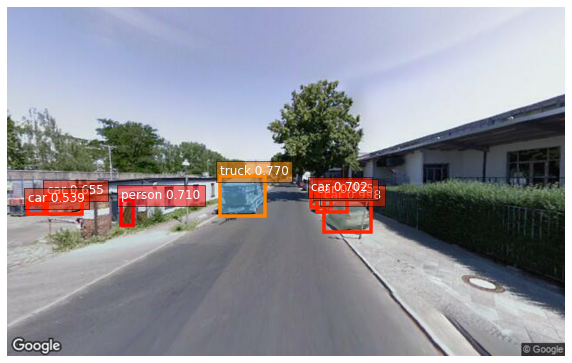

In [18]:

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.axis('off')

# *************Stop Timer***
print("runtime:",datetime.now()-startTime) # stop timer

plt.show()

In [19]:
print(net.classes)
print(ids[0:10])

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
[[2.]
 [2.]
 [7.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [20]:
## explanation to "dictionary"

Dict_A={"A":10,"B":[1,3,5],"C":"Your Name"}
Dict_A.keys()
Dict_A.values()

print(Dict_A.keys())
print(Dict_A.values())
print(Dict_A['A'])



dict_keys(['A', 'B', 'C'])
dict_values([10, [1, 3, 5], 'Your Name'])
10


In [21]:
## Use dictionary to count all the matrixs

In [22]:
import pandas as pd

Count={}
for i in range(len(net.classes)):
    # create a class id list
    className = net.classes[i]
    Count[className] = 0

for j in range(len(ids)):
    classID=int(ids[j])
    classscore=scores[j]
    if classscore>0.5:
        if classID>0:
            className=net.classes[classID]
            Count[className] +=1
            print(className,classscore)

            
df_Count = pd.DataFrame(Count.items(), columns=['class', 'number'])
df_Count = df_Count.T
df_Count['FID'] = file_name.split(".")[0]
print(Count)
df_Count.head(5)

car [0.99817073]
car [0.9346835]
truck [0.7702071]
car [0.70208216]
car [0.6552481]
car [0.53943294]
{'person': 0, 'bicycle': 0, 'car': 5, 'motorcycle': 0, 'airplane': 0, 'bus': 0, 'train': 0, 'truck': 1, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'couch': 0, 'potted plant': 0, 'bed': 0, 'dining table': 0, 'toilet': 0, 'tv': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,FID
class,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat,traffic light,...,sink,refrigerator,book,clock,vase,scissors,teddy bear,hair drier,toothbrush,21
number,0,0,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,21


# Automated Process for multiple images

This part will automate the process of loading images in input folder, doing instance segmentations, saving a summary result csv, and saving output images with masks)

In [23]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import os
path_in='originSVI/'
path_out ='mask_rcnn/'
all_files = [f for f in listdir(path_in)]
### Get only text files
jpg_files = list(filter(lambda x: x[-5:] == ('.jpeg') or x[-4:] == ('.jpg'), all_files))
jpg_files.sort()
#print(jpg_files) 
print("1.Total Image Files in the folder:",len(jpg_files))

1.Total Image Files in the folder: 9


In [24]:
# # net.classes includes all the class name in the pre training model
# mcnn_count={}
# for i in range(len(net.classes)):
#     className = net.classes[i]
#     mcnn_count[className] = 0
# print(mcnn_count)

In [25]:
import pandas as pd
import numpy as np
import time
import matplotlib
### build a empty DataFrame
df_mrcnn=pd.DataFrame()
### here is what you want to count
keywords=['person','bicycle','car','motorcycle','bus','truck','boat','traffic light','dog','dining table']

ID=0
# Load images in the folder
for filename in jpg_files:
    
    fileID=filename.split('.')[0]
    # 1.0 Writedown photo ID to the result dataframe
    df_mrcnn.loc[ID,'Fid']=fileID
    # 1.1 Load an image from the images folder
    # *************Start Timer***
    startTime = time.time() # initiate timer
    x, orig_img = data.transforms.presets.rcnn.load_test(path+filename)

    # 2.MaskRcnn Results
    ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x.as_in_context(mx.gpu(0)))]

    # 3.paint segmentation mask on images directly
    width, height = orig_img.shape[1], orig_img.shape[0]
    masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
    orig_img = utils.viz.plot_mask(orig_img, masks)

    # 4.identical to Faster RCNN object detection
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                             class_names=net.classes, ax=ax)
    plt.axis('off')

    # 5.Save the segmentation result to a csv in the folder
    # 5.1 Select the score
    selected=ids[np.where(scores>0.2)]
    #print("filtered:",selected)
    unique, counts = np.unique(selected, return_counts=True)
    #print(unique,counts)
    # 5.2 count difference class
    for i in range(len(unique)):
        cls_id=int(unique[i])
        cls_name=net.classes[cls_id]
        # print(i,cls_id,cls_name,counts[i])
        if cls_name in keywords:
            #print('in keywords',i,cls_id,cls_name,counts[i])
            df_mrcnn.loc[ID,cls_name]=counts[i]
            df_mrcnn.to_csv(path_out+'mrcnn_result.csv', index=False, encoding='utf-8')
    ID+=1
    
    df_mrcnn.to_csv(path_out+'mrcnn_result.csv', index=False, encoding='utf-8')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path_out+'output_Img/'+ fileID+'.png', bbox_inches='tight')
    #plt.show()
    plt.close()
    
        # *************Stop Timer***
    endTime = time.time()
    print('Processing', filename, 'ID:', fileID,"runtime:",endTime-startTime)
print("All Done")
df_mrcnn.head(5)
    


Processing 10.jpg ID: 10 runtime: 1.9319252967834473
Processing 11.jpg ID: 11 runtime: 2.005634307861328
Processing 20.jpg ID: 20 runtime: 2.131301164627075
Processing 21.jpg ID: 21 runtime: 1.7029995918273926
Processing 24.jpg ID: 24 runtime: 1.820194959640503
Processing 3.jpg ID: 3 runtime: 1.424556016921997
Processing 7.jpg ID: 7 runtime: 1.7337555885314941
Processing 8.jpg ID: 8 runtime: 1.6279592514038086
Processing 9.jpg ID: 9 runtime: 1.571061372756958
All Done


,Fid,person,car,bicycle,motorcycle,bus,truck,boat
0,10,1.0,12.0,NaN,NaN,NaN,NaN,NaN
1,11,2.0,21.0,2.0,2.0,1.0,1.0,NaN
2,20,1.0,17.0,NaN,NaN,NaN,1.0,1.0
3,21,1.0,10.0,NaN,NaN,NaN,2.0,1.0
4,24,NaN,26.0,NaN,NaN,NaN,NaN,NaN


In [26]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']